# Model Development

# #Model Building 

# #Decision Tree

Decision tree is a type of supervised learning algorithm(having a pre-defined target variable) that is mostly used in classification problems. 
In this technique, we split the population or sample into two or more homogeneous sets(or sub-populations) based on most significant splitter / differentiator in input variables.
Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable.

In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [4]:
#import data set
sf = pd.read_csv("/Users/bonbon/downloads/USF/2019 Fall/MSIS678_DataWarehousing/Project/San_Francisco_Communitywide_Greenhouse_Gas_Inventory.csv")

Let's make the continous into categorical

In [5]:
Sector_General_np = np.array(sf['Sector_General'])
(Sector_General_cat, Sector_General_cat_dict) = stattools.categorical(Sector_General_np, drop = True, dictnames = True)
inv_map = {v: k for k, v in Sector_General_cat_dict.items()}
Sector_General_cat_pd = sf['Sector_General'].apply(lambda r: inv_map[r])

Sector_Detail1_np = np.array(sf['Sector_Detail1'])
(Sector_Detail1_cat, Sector_Detail1_cat_dict) = stattools.categorical(Sector_Detail1_np, drop = True, dictnames = True)
inv_map = {v: k for k, v in Sector_Detail1_cat_dict.items()}
Sector_Detail1_cat_pd = sf['Sector_Detail1'].apply(lambda r: inv_map[r])

Sector_Detail2_np = np.array(sf['Sector_Detail2'])
(Sector_Detail2_cat, Sector_Detail2_cat_dict) = stattools.categorical(Sector_Detail2_np, drop = True, dictnames = True)
inv_map = {v: k for k, v in Sector_Detail2_cat_dict.items()}
Sector_Detail2_cat_pd = sf['Sector_Detail2'].apply(lambda r: inv_map[r])

Sector_GPC_np = np.array(sf['Sector_GPC'])
(Sector_GPC_cat, Sector_GPC_cat_dict) = stattools.categorical(Sector_GPC_np, drop = True, dictnames = True)
inv_map = {v: k for k, v in Sector_GPC_cat_dict.items()}
Sector_GPC_cat_pd = sf['Sector_GPC'].apply(lambda r: inv_map[r])

Sector_GPC_Detail_np = np.array(sf['Sector_GPC_Detail'])
(Sector_GPC_Detail_cat, Sector_GPC_Detail_cat_dict) = stattools.categorical(Sector_GPC_Detail_np, drop = True, dictnames = True)
inv_map = {v: k for k, v in Sector_GPC_Detail_cat_dict.items()}
Sector_GPC_Detail_cat_pd = sf['Sector_GPC_Detail'].apply(lambda r: inv_map[r])

Commodity_Type_np = np.array(sf['Commodity_Type'])
(Commodity_Type_cat, Commodity_Type_cat_dict) = stattools.categorical(Commodity_Type_np, drop = True, dictnames = True)
inv_map = {v: k for k, v in Commodity_Type_cat_dict.items()}
Commodity_Type_cat_pd = sf['Commodity_Type'].apply(lambda r: inv_map[r])

Quantity_Units_np = np.array(sf['Quantity_Units'])
(Quantity_Units_cat, Quantity_Units_cat_dict) = stattools.categorical(Quantity_Units_np, drop = True, dictnames = True)
inv_map = {v: k for k, v in Quantity_Units_cat_dict.items()}
Quantity_Units_cat_pd = sf['Quantity_Units'].apply(lambda r: inv_map[r])

In [6]:
#concatenate categorical X variables
sf = pd.concat((sf[['Calendar_Year']], Sector_General_cat_pd, Sector_Detail1_cat_pd, Sector_Detail2_cat_pd, Sector_GPC_cat_pd, Sector_GPC_Detail_cat_pd, Commodity_Type_cat_pd,sf[['Quantity']], Quantity_Units_cat_pd, sf[['Emissions_mtCO2e']]), axis = 1)
#split training data set and test data set
sf_train, sf_test = train_test_split(sf, test_size = 0.5, random_state = 8)

In [7]:
#define axises
X = sf_train.drop('Emissions_mtCO2e', 1)
Xvl = sf_test.drop('Emissions_mtCO2e', 1)
y = sf_train.Emissions_mtCO2e
yvl = sf_test.Emissions_mtCO2e
#define the names of X
X_names = ["Calendar_Year", " Sector_General", "Sector_Detail1", "Sector_Detail2", "Sector_GPC", "Sector_GPC_Detail", "Commodity_Type", "Quantity", "Quantity_Units"]

In [8]:
# define the interval and range of y
numOfCat = 3
y_names = [str(i) for i in range(numOfCat)]
print(y.to_string())
y = pd.qcut(y, numOfCat, labels=y_names)
yvl = pd.qcut(yvl, numOfCat, labels=y_names)

137     365526.16
325          0.00
282      42026.31
52           0.00
88       36217.21
469    1666352.67
189          0.00
34         765.87
496       5569.95
221      22594.74
201     609521.19
94        8428.33
187          0.00
389          0.00
132    2053822.63
1      1378706.04
93        8536.91
352      22640.50
113          0.00
242          0.00
314          1.09
241          1.84
203     335194.72
218      34079.26
268     537425.07
312         11.17
504        543.37
237         70.50
62           0.00
26       11542.90
77      152273.32
139     273327.12
229       3320.19
392          0.00
455         15.92
335     287174.22
305        103.34
535          0.00
23       23655.00
171         70.50
262          0.00
379          9.05
42           0.00
106         58.44
212      81034.44
51           0.00
481      90007.48
299        300.49
142     150950.47
521         44.93
478     124386.70
82       91033.98
415      23763.00
116          0.00
523         29.86
344      8

Let's get a sense to see how the y acts like, and after that, we are able to split them in an reasonalbe range with intervals.

In [9]:
print(y.to_string())

137    2
325    0
282    2
52     0
88     2
469    2
189    0
34     1
496    1
221    1
201    2
94     1
187    0
389    0
132    2
1      2
93     1
352    1
113    0
242    0
314    0
241    0
203    2
218    2
268    2
312    0
504    1
237    1
62     0
26     1
77     2
139    2
229    1
392    0
455    0
335    2
305    1
535    0
23     1
171    1
262    0
379    0
42     0
106    1
212    2
51     0
481    2
299    1
142    2
521    1
478    2
82     2
415    2
116    0
523    0
344    2
257    0
261    0
148    2
128    0
508    1
145    2
164    1
277    2
216    2
403    2
57     0
365    1
198    2
321    0
532    0
76     2
39     1
362    1
209    2
433    1
445    1
434    1
499    1
275    2
425    1
283    2
178    0
330    2
443    1
435    1
355    1
404    2
101    1
323    0
385    0
401    2
172    1
489    1
117    0
232    1
121    0
214    2
296    1
246    0
324    0
252    0
307    1
326    0
357    1
337    2
271    2
291    1
124    0
457    0
10     2
3

We define y into three categories: 0, 1, 2, which stands for the low emission of CO2, the median emission of CO2, and the high emission of CO2.

In [10]:
#set up the decission tree model with CART
cart_sf_train = DecisionTreeClassifier(criterion = "gini", min_samples_leaf = 5).fit(X,y)
export_graphviz(cart_sf_train, out_file = "/Users/bonbon/downloads/USF/2019 Fall/MSIS678_DataWarehousing/Project/cart_sf_train.dot", feature_names=X_names, class_names = y_names)

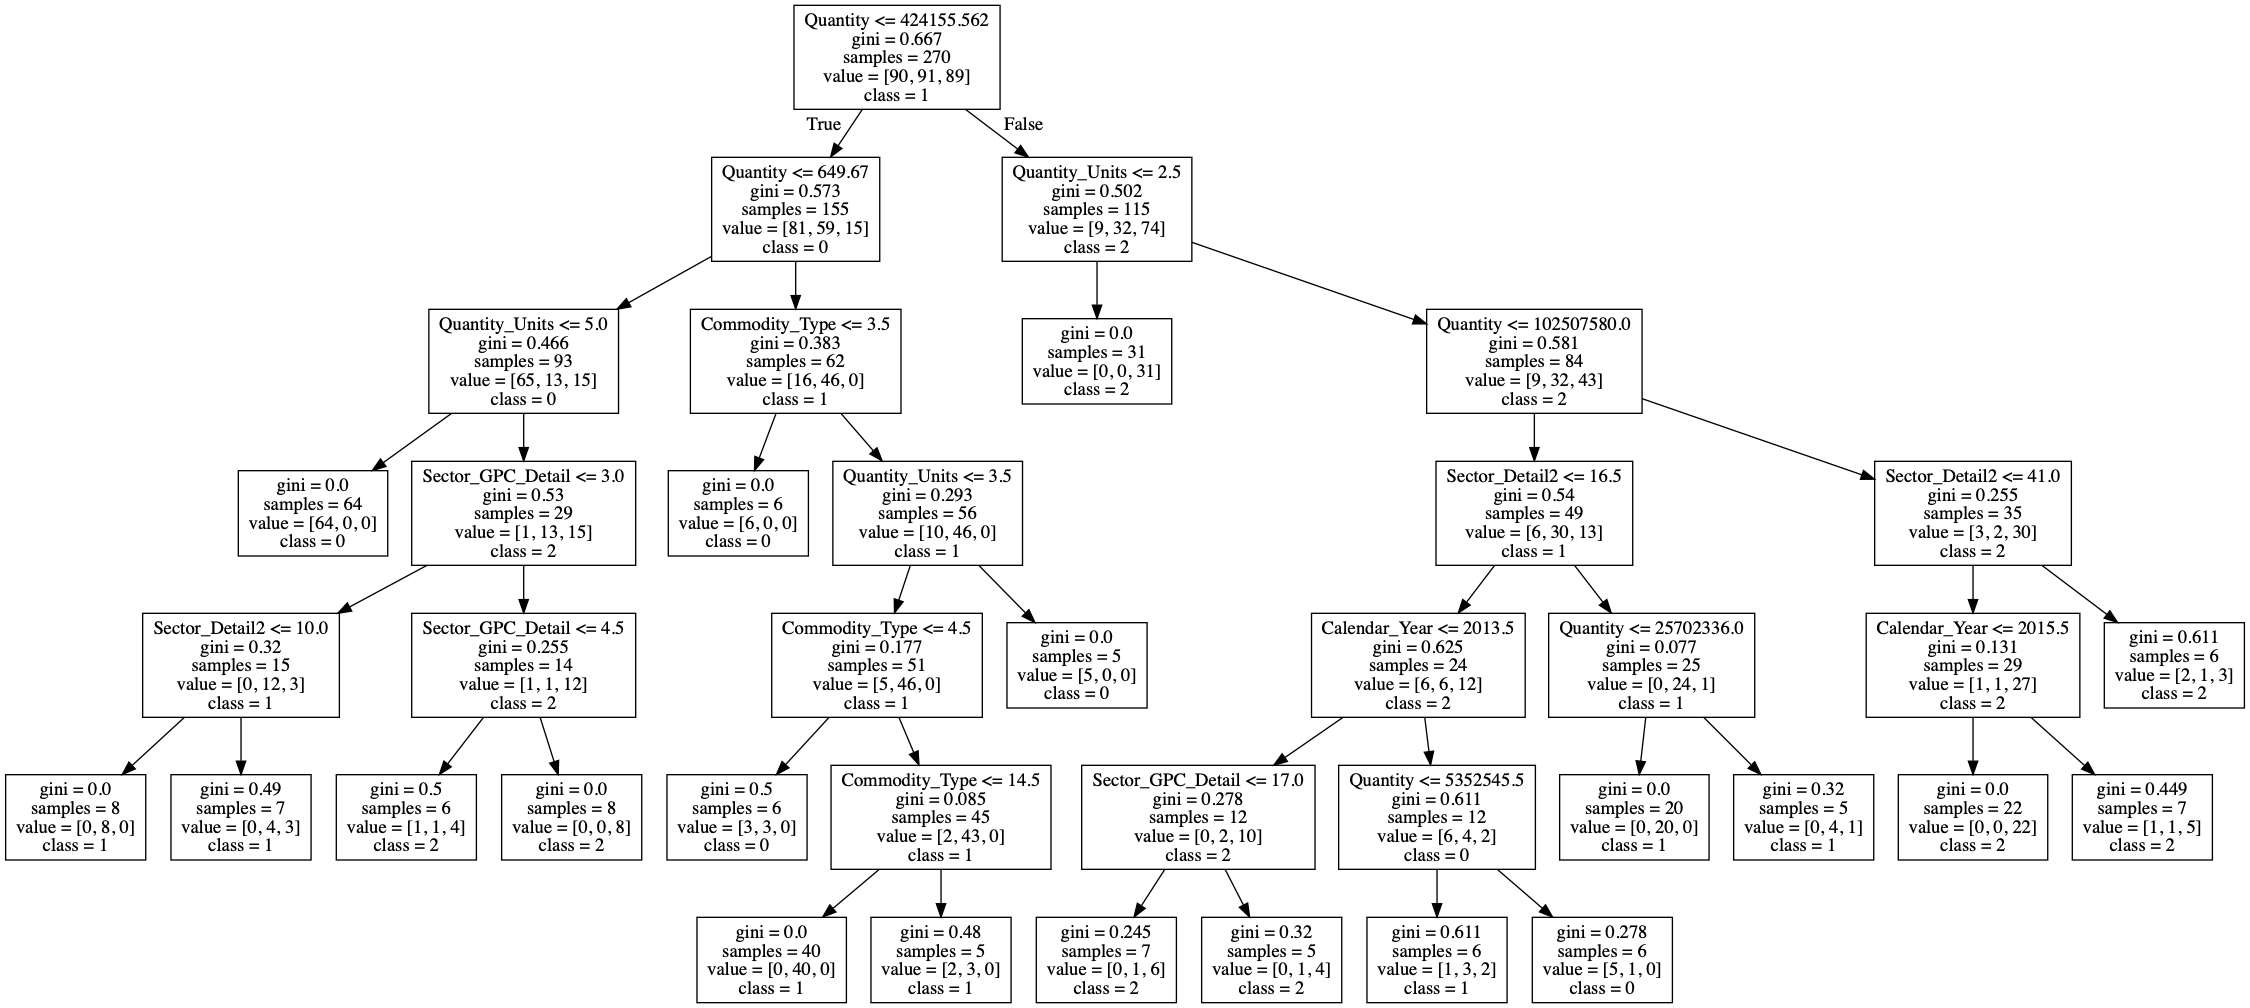

In [11]:
#compute the accuracy score of the decision tree
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(random_state = 1)
model.fit(X,y)
pred_test = model.predict(Xvl)
score = accuracy_score(yvl, pred_test)
print('accuracy_score', score)

accuracy_score 0.8592592592592593


We got an accuracy of 85.9%.
Let’s build another model, i.e. Random Forest, a tree based ensemble algorithm and try to improve our model by improving the accuracy.

# #Feature Importance

Let us find the feature importance now, i.e. which features are most important for this problem. We will use featureimportances attribute of sklearn to do so. It will return the feature importances (the higher, the more important the feature).

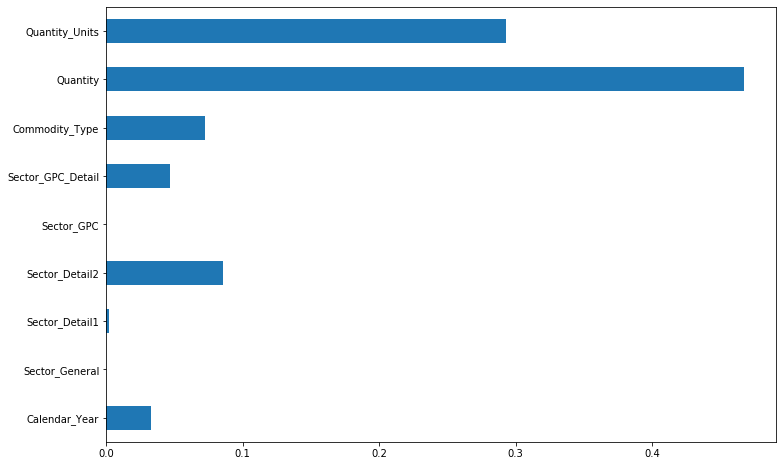

In [17]:
# extract feature importances, convert into a Series
importances = pd.Series(cart_sf_train.feature_importances_, index=X.columns)

# plot the horizontal bar chart
importances.plot(kind='barh', figsize=(12,8))
plt.show()

We can see that Quantity is the most important feature followed by Quantity_Units, Sector_Detail2, Commodity_Type, Sector_GPC_Detail, calendar_Year with decision tree model. 
/So, feature engineering helped us in predicting our target variable.

In [24]:
#Build a forest and compute the feature importances
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
#compute the accuracy score of the random forest
pred_test_forest = forest.predict(Xvl)
score_forest = accuracy_score(yvl, pred_test_forest)
print('accuracy_score of random forest', score_forest)

accuracy_score of random forest 0.8777777777777778


The validation accuracy for this model is 87.8%

In [25]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 7 (0.259328)
2. feature 3 (0.171357)
3. feature 6 (0.138352)
4. feature 0 (0.103673)
5. feature 8 (0.095000)
6. feature 5 (0.071538)
7. feature 2 (0.062678)
8. feature 1 (0.054573)
9. feature 4 (0.043502)


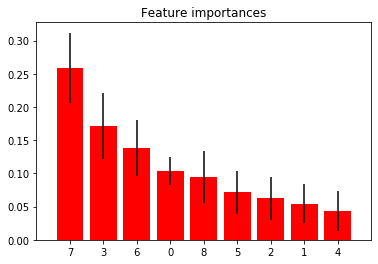

In [21]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

We can see that Quantity (7) is the most important feature followed by Sector_Detail2 (3), Commodity_Type (6), calendar_Year (0), quantity_units (8), Sector_GPC_Detail (5), Sector_Detail (2), Sector_General (1), and Sector_GPC (4)  with random forest model. 